# SENAI / INEP - Dados sobre evasão

Autor: Alexandre Marcondes

**Exercício:** Montem uma classificacao utilizando a base da Veltec ou Senai.

Monte testes de avaliacao de diferentes classificadores considerando:

* Busca por hiperparametros (Considere testar parametros de regularizacao)

* Busca por features

* Utilize um metodo de validacao cruzada

## Explicação do arquivo CSV
---

Este arquivo CSV está relacionado a demanda da Gerência de Educação: LUMNI - Assistente virtual.

Um dos objetivos deste trabalho foi a previsão de evasão de alunos do SENAI-PR. Dados dados históricos de um grupo de alunos, como dados sobre notas em avaliações, frequência, condições socioeconômicas e outros, a tarefa seria determinar o potencial de evasão de um aluno com determinadas características.

Como a gerência não disponibilizou nenhum dado (até o fim da primeira sprint), os residentes buscaram dados disponibilizados pelo INEP do Censo da Educação Superior, disponível na página de Microdados (http://inep.gov.br/microdados). A partir dos dados do censo de 2018, foi realizada uma filtragem para obter os dados de alunos das unidades do SENAI-PR. Após isso, foi realizada uma limpeza dos dados, eliminando informações que foram consideradas irrelevantes para os objetivos propostos.

---

In [58]:
import pandas as pd

In [59]:
senai = pd.read_csv('senai_inep.csv')

In [60]:
senai.shape

(3309, 22)

In [61]:
senai.head()

,CO_IES,NO_IES,CO_CURSO,NO_CURSO,TP_TURNO,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,ID_ALUNO,TP_COR_RACA,TP_SEXO,...,IN_DEFICIENCIA,DT_INGRESSO_CURSO,IN_RESERVA_VAGAS,IN_FINANCIAMENTO_ESTUDANTIL,IN_APOIO_SOCIAL,IN_ATIVIDADE_EXTRACURRICULAR,TP_ESCOLA_CONCLUSAO_ENS_MEDIO,IN_MATRICULA,IN_CONCLUINTE,TP_SITUACAO
0,1400,FACULDADE DA INDÚSTRIA SÃO JOSÉ DOS PINHAIS,20516,ADMINISTRAÇÃO,3.0,1.0,1,C2E870F652B2299ED62D4AA8038A9422,1,1,...,0,01JUL2009:00:00:00,0,0.0,0,0,1,0,0,0
1,1400,FACULDADE DA INDÚSTRIA SÃO JOSÉ DOS PINHAIS,20516,ADMINISTRAÇÃO,3.0,1.0,1,81A4D85417E7123C8DF075A0A2629E8E,0,1,...,0,01JUL2009:00:00:00,0,0.0,0,0,1,1,1,1
2,1400,FACULDADE DA INDÚSTRIA SÃO JOSÉ DOS PINHAIS,20516,ADMINISTRAÇÃO,3.0,1.0,1,77F900FA4B592D61029032DCA66D9F55,2,2,...,0,01JAN2014:00:00:00,0,0.0,0,0,1,1,1,1
3,1400,FACULDADE DA INDÚSTRIA SÃO JOSÉ DOS PINHAIS,20516,ADMINISTRAÇÃO,3.0,1.0,1,4D21A9481680ED505C359CE9A0F8F212,0,2,...,0,01JAN2006:00:00:00,0,0.0,0,0,9,0,0,1
4,1400,FACULDADE DA INDÚSTRIA SÃO JOSÉ DOS PINHAIS,20516,ADMINISTRAÇÃO,3.0,1.0,1,63341AACBCB526FE3A929666DE581731,0,1,...,0,01JAN2010:00:00:00,0,0.0,0,0,1,0,0,0


In [62]:
senai.columns

Index(['CO_IES', 'NO_IES', 'CO_CURSO', 'NO_CURSO', 'TP_TURNO',
       'TP_GRAU_ACADEMICO', 'TP_MODALIDADE_ENSINO', 'ID_ALUNO', 'TP_COR_RACA',
       'TP_SEXO', 'NU_IDADE', 'TP_NACIONALIDADE', 'IN_DEFICIENCIA',
       'DT_INGRESSO_CURSO', 'IN_RESERVA_VAGAS', 'IN_FINANCIAMENTO_ESTUDANTIL',
       'IN_APOIO_SOCIAL', 'IN_ATIVIDADE_EXTRACURRICULAR',
       'TP_ESCOLA_CONCLUSAO_ENS_MEDIO', 'IN_MATRICULA', 'IN_CONCLUINTE',
       'TP_SITUACAO'],
      dtype='object')

**A coluna 'TP_SITUACAO' indica a situação atual da matrícula do aluno (vinculado ou desvinculado) e pode ser utilizada como coluna-alvo**. A situação "vinculado" pode indicar diversas situações, como o aluno que está cursando de fato, ou alunos que estão com a matrícula temporariamente trancada, por exemplo.

As classes desse atributo são:
* 1: aluno vinculado;
* 2: aluno desvinculado.

In [63]:
senai.TP_SITUACAO.value_counts()

1    2882
0     427
Name: TP_SITUACAO, dtype: int64

Entre as demais colunas, estão colunas descritivas da instituição, curso e aluno, e uma análise pode ser realizada para decidir quais atributos poderiam ser utilizados como características para o modelo. Entre as informações disponíveis estão a modalidade do curso, nacionalidade do aluno, informações sobre gênero, raça, modalidade de ingresso, entre outras informações.

O arquivo "Dicionаrio de Variаveis" pode ser acessado para obter as descrições dos atributos presentes no CSV.

# Pipeline
---

### Bibliotecas
---

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB

#Classificadores Lineares
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression

#Classificadores KNN
from sklearn.neighbors import KNeighborsClassifier

#Classificadores Naive Nayes
from sklearn.naive_bayes import MultinomialNB

#Classificadores Arvores de Decisão
from sklearn.tree import DecisionTreeClassifier

#SVM
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report

from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import math

from sklearn import linear_model
from scipy.special import expit

from sklearn.metrics import confusion_matrix
import scipy
from scipy.io import arff

import numpy as np
from sklearn.datasets import fetch_olivetti_faces
from sklearn.svm import SVC
#from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.externals import joblib

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score, LeaveOneOut

### Preparação das features
---

In [65]:
senai.columns

Index(['CO_IES', 'NO_IES', 'CO_CURSO', 'NO_CURSO', 'TP_TURNO',
       'TP_GRAU_ACADEMICO', 'TP_MODALIDADE_ENSINO', 'ID_ALUNO', 'TP_COR_RACA',
       'TP_SEXO', 'NU_IDADE', 'TP_NACIONALIDADE', 'IN_DEFICIENCIA',
       'DT_INGRESSO_CURSO', 'IN_RESERVA_VAGAS', 'IN_FINANCIAMENTO_ESTUDANTIL',
       'IN_APOIO_SOCIAL', 'IN_ATIVIDADE_EXTRACURRICULAR',
       'TP_ESCOLA_CONCLUSAO_ENS_MEDIO', 'IN_MATRICULA', 'IN_CONCLUINTE',
       'TP_SITUACAO'],
      dtype='object')

In [66]:
# Label encoder para a variável algumas variáveis
le = preprocessing.LabelEncoder()
senai['CO_IES'] = le.fit_transform(senai['CO_IES'])
senai['NO_CURSO'] = le.fit_transform(senai['NO_CURSO'])

# Colunas características
X = senai.drop(['TP_SITUACAO','DT_INGRESSO_CURSO','NO_IES','ID_ALUNO'],axis=1)
# Coluna alvo
y = senai.loc[:,'TP_SITUACAO']

# Conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Criação das pipelines
---

In [67]:
# Crição das pipelines
pipe_log = Pipeline([('scl', StandardScaler()), ('clf', LogisticRegression())])
pipe_knn = Pipeline([('scl', StandardScaler()), ('clf', KNeighborsClassifier(n_neighbors=3))])
pipe_tree = Pipeline([('scl', StandardScaler()), ('clf', DecisionTreeClassifier())])
pipe_nb = Pipeline([('scl', StandardScaler()), ('clf', GaussianNB())])

pipe_list = [pipe_log, pipe_knn, pipe_tree, pipe_nb]

# Dicionário para facilitar identificacao
pipe_dict = {0: 'Logistic Regression', 1: 'KNN', 2: 'Decision Tree', 3: 'Navie Bayes'}

# aplicando fit
# Generaliza a execucao do fit de cada ultima funcao do pipe
for pipe in pipe_list:
    pipe.fit(X_train, y_train)

# Compara acurácia
for idx, val in enumerate(pipe_list):
    print('%s pipeline test accuracy: %.3f' % (pipe_dict[idx], val.score(X_test, y_test)))

# para cada modelo treinado obtem val score
best_acc = 0.0
best_clf = 0
best_pipe = ''
for idx, val in enumerate(pipe_list):
    # Descobre o melhor val.score e armazen em best_clf
    if val.score(X_test, y_test) > best_acc:
        best_acc = val.score(X_test, y_test)
        best_pipe = val
        best_clf = idx
print('Classifier with best accuracy: %s' % pipe_dict[best_clf])

Logistic Regression pipeline test accuracy: 0.878
KNN pipeline test accuracy: 0.875
Decision Tree pipeline test accuracy: 0.873
Navie Bayes pipeline test accuracy: 0.846
Classifier with best accuracy: Logistic Regression


### Busca por features
---

In [68]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
print(X.shape)
X_new = SelectKBest(chi2, k=15).fit_transform(X, y) # Escolha de 13 features com o método kbest
print(X_new.shape)

(3309, 18)
(3309, 15)


### Otimizando os hiperparâmetros

### Gridsearch
---

In [69]:
# Utiliza o novo X, gerado através da seleção de features
X_train, X_test, y_train, y_test = train_test_split(X_new,y, test_size=0.2)

In [70]:
# Utilizar aqui o algoritmo com melhor score
pipe = [pipe_tree]

param_range = [1, 2, 3, 4, 5]

# grid search params
#grid_params = [{'clf__criterion': ['gini', 'entropy'],
#               'clf__presort': [True, False]}]
grid_params = [{'clf__criterion': ['gini', 'entropy'],
    'clf__min_samples_leaf': param_range,
    'clf__max_depth': param_range,
    'clf__min_samples_split': param_range[1:],}]

# Construct grid search
gs = GridSearchCV(estimator=pipe_tree,
    param_grid=grid_params,
    scoring='accuracy', n_jobs=-1)

# Fit using grid search
gs.fit(X_train, y_train)

# Best accuracy
print('Best accuracy: %.3f' % gs.best_score_)

# Best params
print('\nBest params:\n', gs.best_params_)

Best accuracy: 0.888

Best params:
 {'clf__criterion': 'gini', 'clf__max_depth': 5, 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 2}


### Validação cruzada
---

In [77]:
kfold = KFold(n_splits=10, random_state=100, shuffle=True)
model_kfold = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=4, min_samples_split=2)
results_kfold = cross_val_score(model_kfold, X_train, y_train, cv=kfold)

print("scores: ", results_kfold) 

print("Acuracia: %.2f%%" % (results_kfold.mean()*100.0))

scores:  [0.91698113 0.89056604 0.86415094 0.86037736 0.92075472 0.8754717
 0.86792453 0.86742424 0.89015152 0.91287879]
Acuracia: 88.67%


In [78]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=4, min_samples_split=2)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.39      0.47        90
           1       0.91      0.96      0.93       572

    accuracy                           0.88       662
   macro avg       0.76      0.67      0.70       662
weighted avg       0.87      0.88      0.87       662



A acurácia atingiu um valor bom (88%). Porém, observa-se que a precisão para os alunos que evadiram (classe 0) está bastante baixa. Isso ocorre pois os dados estão desbalanceados.

### Balanceamento de classes

A coluna-alvo está desbalanceada. O número de amostras de alunos que evadiram é consideravelmente menor que o número de alunos que não evadiram.

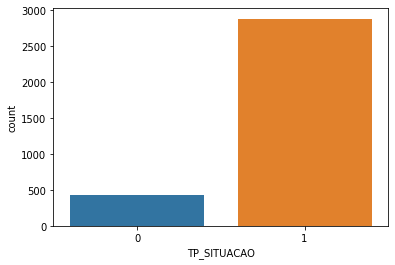

In [79]:
sns.countplot(senai.TP_SITUACAO);

Utilizaremos a biblioteca imblearn para fazer o balanceamento de classes.

In [80]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

1    337
0    337
Name: TP_SITUACAO, dtype: int64


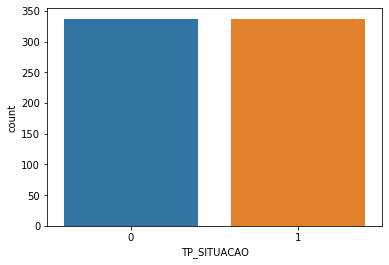

In [81]:
# usar técnica under-sampling
rus = RandomUnderSampler()
X_res, y_res = rus.fit_sample(X_train, y_train)
 
# ver o balanceamento das classes
print(pd.Series(y_res).value_counts())
 
# plotar a nova distribuição de classes
sns.countplot(y_res);

Agora fazemos o fit novamente:

In [83]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=4, min_samples_split=2)
tree.fit(X_res,y_res)
y_pred = tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.99      0.67        90
           1       1.00      0.85      0.92       572

    accuracy                           0.87       662
   macro avg       0.75      0.92      0.79       662
weighted avg       0.93      0.87      0.88       662



1    2310
0    2310
Name: TP_SITUACAO, dtype: int64


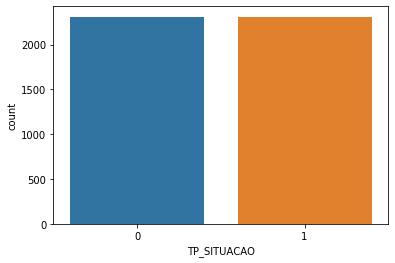

In [84]:
# usar técnica under-sampling
rus = RandomOverSampler()
X_res, y_res = rus.fit_sample(X_train, y_train)
 
# ver o balanceamento das classes
print(pd.Series(y_res).value_counts())
 
# plotar a nova distribuição de classes
sns.countplot(y_res);

In [85]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=4, min_samples_split=2)
tree.fit(X_res,y_res)
y_pred = tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.98      0.66        90
           1       1.00      0.85      0.92       572

    accuracy                           0.87       662
   macro avg       0.75      0.91      0.79       662
weighted avg       0.93      0.87      0.88       662



As técnicas de under sampling e over sampling não resolveram o problema, pois aumentaram minimamente o f1-score da classe menor. 

Vamos tentar diferentes métodos presentes na biblioteca.

In [86]:
from imblearn.over_sampling import SMOTE

1    2310
0    2310
Name: TP_SITUACAO, dtype: int64


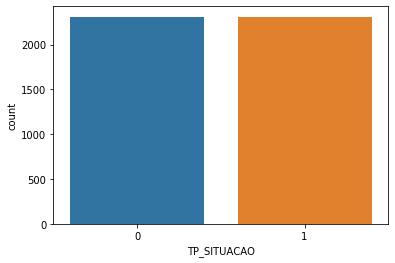

In [87]:
rus = SMOTE()
X_res, y_res = rus.fit_sample(X_train, y_train)
# ver o balanceamento das classes
print(pd.Series(y_res).value_counts())
 
# plotar a nova distribuição de classes
sns.countplot(y_res);

In [88]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=4, min_samples_split=2)
tree.fit(X_res,y_res)
y_pred = tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.94      0.64        90
           1       0.99      0.84      0.91       572

    accuracy                           0.85       662
   macro avg       0.74      0.89      0.77       662
weighted avg       0.92      0.85      0.87       662



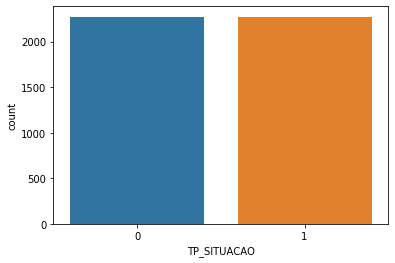

In [89]:
from imblearn.combine import SMOTETomek
rus = SMOTETomek()
X_res, y_res = rus.fit_sample(X_train, y_train)
# plotar a nova distribuição de classes
sns.countplot(y_res);

In [90]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=4, min_samples_split=2)
tree.fit(X_res,y_res)
y_pred = tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.91      0.65        90
           1       0.98      0.86      0.92       572

    accuracy                           0.87       662
   macro avg       0.75      0.89      0.78       662
weighted avg       0.92      0.87      0.88       662



Com o método de under sampling o f1_score da classe menor aumentou de 0,47 para 0,67. 

Não é um número ótimo, porém observa-se a melhoria no desempenho do modelo utilizando técnicas de balanceamento de classes.